In [22]:
import polars as pl
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [23]:
TRAIN_FILE_PATH = Path.cwd() / "data" / "healthcare-dataset-stroke-data.csv"
assert TRAIN_FILE_PATH.exists()
assert TRAIN_FILE_PATH.is_file()

In [24]:
df = pl.read_csv(TRAIN_FILE_PATH, dtypes={'age': pl.Float32}, null_values={'bmi': 'N/A'})
df


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f32,i64,i64,str,str,str,f64,f64,str,i64
9046,"""Male""",67.0,0,1,"""Yes""","""Private""","""Urban""",228.69,36.6,"""formerly smoke...",1
51676,"""Female""",61.0,0,0,"""Yes""","""Self-employed""","""Rural""",202.21,null,"""never smoked""",1
31112,"""Male""",80.0,0,1,"""Yes""","""Private""","""Rural""",105.92,32.5,"""never smoked""",1
60182,"""Female""",49.0,0,0,"""Yes""","""Private""","""Urban""",171.23,34.4,"""smokes""",1
1665,"""Female""",79.0,1,0,"""Yes""","""Self-employed""","""Rural""",174.12,24.0,"""never smoked""",1
56669,"""Male""",81.0,0,0,"""Yes""","""Private""","""Urban""",186.21,29.0,"""formerly smoke...",1
53882,"""Male""",74.0,1,1,"""Yes""","""Private""","""Rural""",70.09,27.4,"""never smoked""",1
10434,"""Female""",69.0,0,0,"""No""","""Private""","""Urban""",94.39,22.8,"""never smoked""",1
27419,"""Female""",59.0,0,0,"""Yes""","""Private""","""Rural""",76.15,null,"""Unknown""",1


In [25]:
df.null_count()

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,201,0,0


In [26]:
df = df.fill_null(strategy='mean')

In [27]:
df.null_count()

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
def plot_counts(column_name: str) -> None:
    grouped_df = df.groupby(column_name).agg(pl.count()).sort("count", reverse=True)
    indices = np.arange(len(grouped_df))
    bars = plt.barh(indices, grouped_df['count'])
    plt.yticks(indices, grouped_df[column_name])
    plt.bar_label(bars, fmt='%d')
    plt.title(f"Counts for {column_name}")


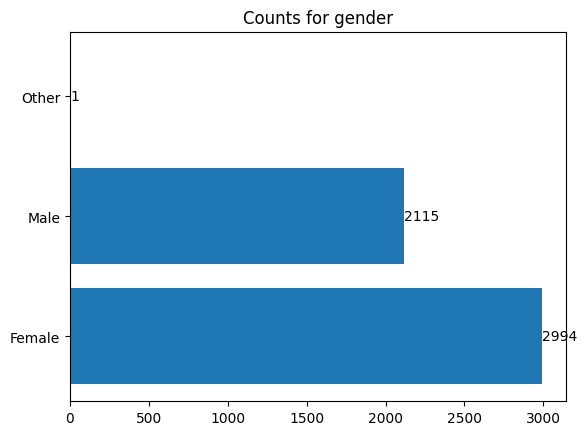

In [29]:
plot_counts('gender')

In [30]:
def plot_histogram(column_name: str, bins: int = 10) -> pl.DataFrame:
    _ = plt.hist(df[column_name], bins=bins)
    _ = plt.title(f'{column_name} distribution')
    

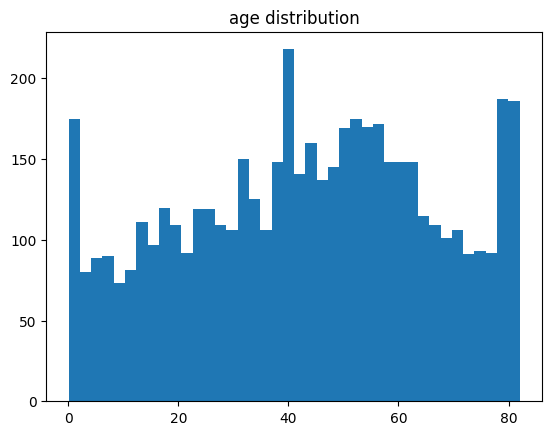

In [31]:
plot_histogram('age', bins=40)

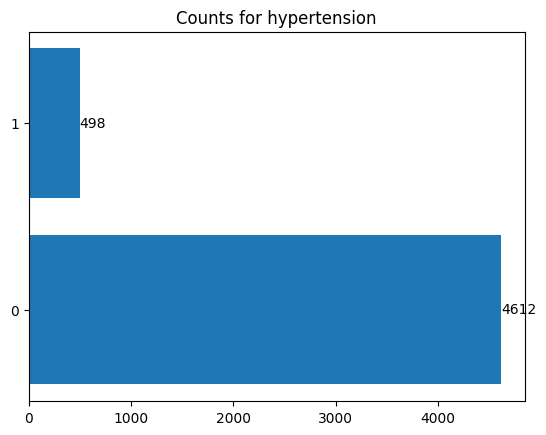

In [32]:
plot_counts('hypertension')

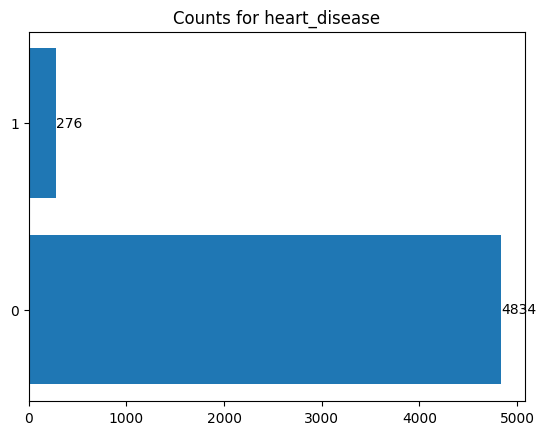

In [33]:
plot_counts('heart_disease')

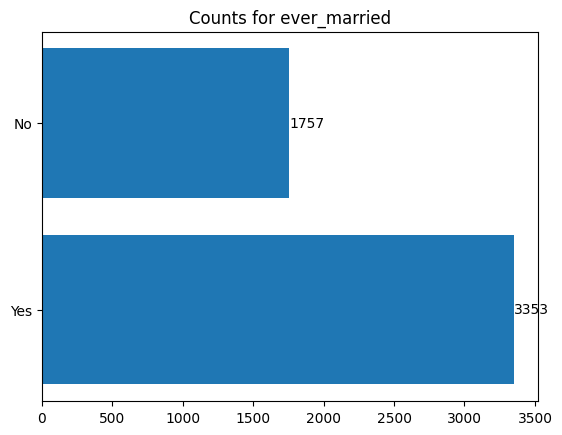

In [34]:
plot_counts('ever_married')

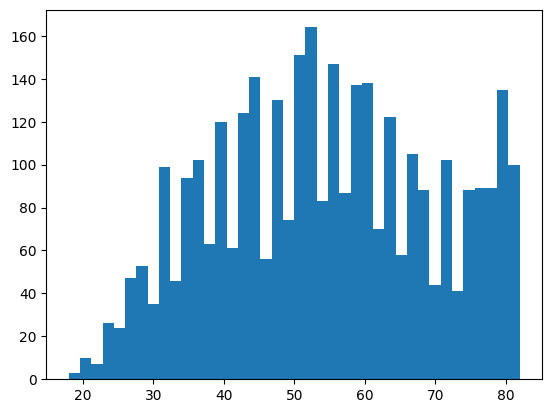

In [35]:
_ = plt.hist(df.filter(pl.col('ever_married') == 'Yes').select(pl.col('age')), bins=40)

There are some kids marked as married

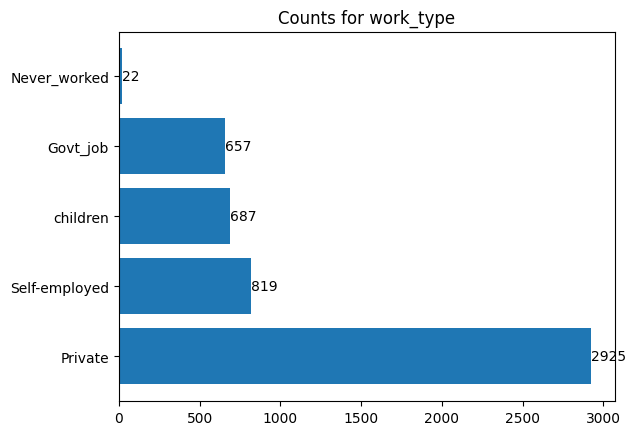

In [36]:
plot_counts('work_type')

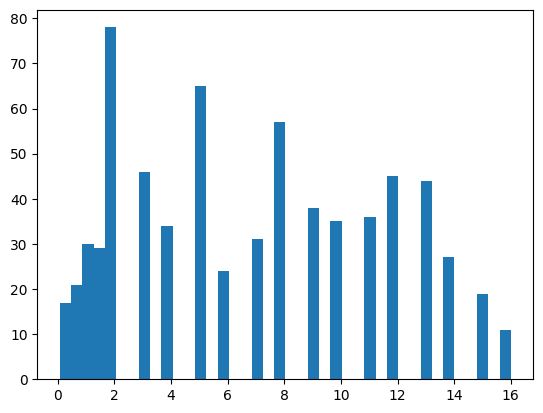

In [37]:
_ = plt.hist(df.filter(pl.col('work_type') == 'children').select(pl.col('age')), bins=40)

There are some old people incorrectly assigned to work type.

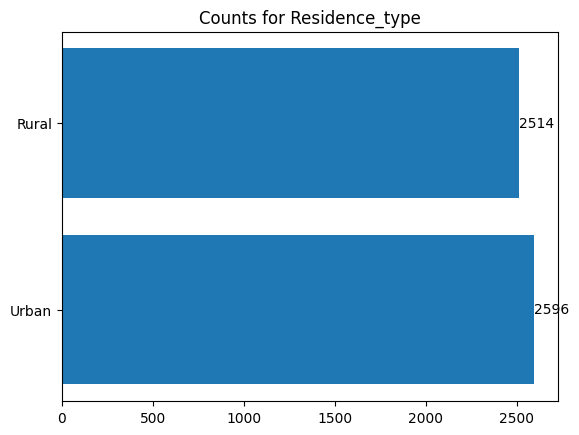

In [38]:
plot_counts('Residence_type')

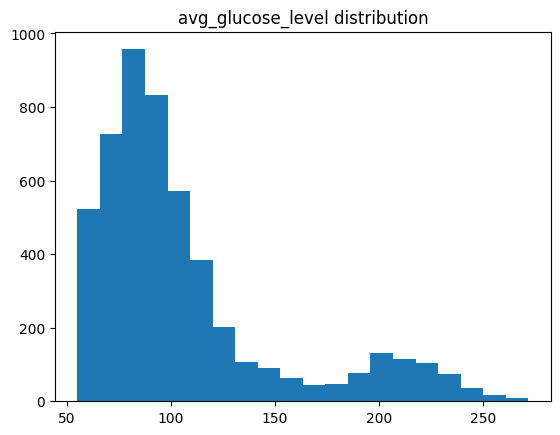

In [39]:
plot_histogram('avg_glucose_level', bins=20)

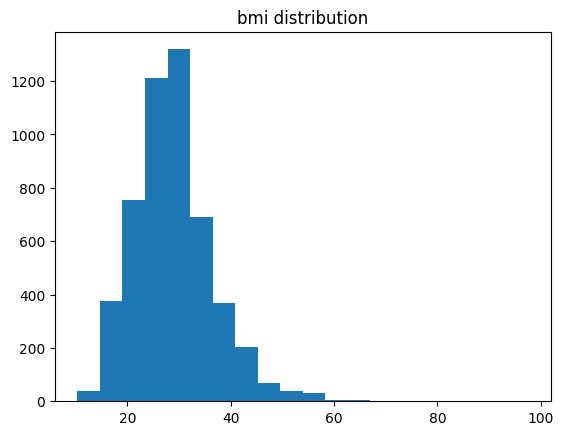

In [40]:
plot_histogram('bmi', bins=20)

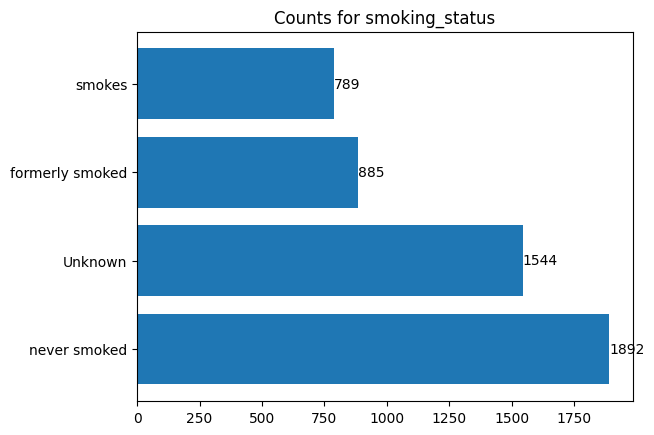

In [41]:
plot_counts('smoking_status')

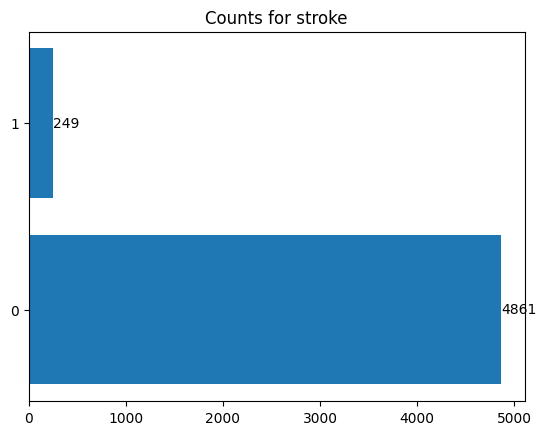

In [42]:
plot_counts('stroke')

In [43]:
df.write_csv(Path.cwd() / "data" / "old.csv")